In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath('../../AB-Generic-Python-Toolbox/'))
import numpy as np
from pathlib import Path
import numpy as np
import pyaudio as pa
from scipy.signal import resample
from scipy.io.wavfile import read as wavread
from scipy.io import wavfile
from scipy import interpolate
# load the toolbox package
from GpyT.Demo.proceduralDemo import demo4_procedural
from pesq import pesq
sys.path.append(os.path.abspath('../software/'))
sys.path.append(os.path.abspath('../software/fitness_functions/'))

from delta_wav import compute_wavfile_delta
import matplotlib.pyplot as plt
import seaborn as sns
try:
    plt.style.use('rossidata')
except:
    pass
from sklearn.utils import shuffle
import math
import pandas as pd

# Comparing the change in sound for the default algorithm
Step 1, load example files

In [2]:
results  = demo4_procedural()

Channels [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] are very similar to the default output.


In [3]:
## loading files
rate_ref, ref  = wavread(results['sourceName'])
rate_out,deg_out=results['audioFs'],results['audioOut']


In [5]:
rate_ref,ref

(22050, array([ 0, -1,  0, ..., -1,  0, -1], dtype=int16))

In [40]:
## Computing delta
compute_wavfile_delta(ref,rate_ref,deg_out,rate_out)

1.7934448719024658

# Systematically testing this performance metric


In [57]:
STD_n=math.sqrt(np.mean(ref**2))
noise=np.random.normal(0, STD_n, ref.shape[0])


trials={'signal':(ref,rate_ref),
        'signal_plus_noise':(ref+noise,rate_ref),
       'noise':(noise,rate_ref)}

In [61]:
nb_results={}
for key in trials.keys():
    test=trials[key]
    nb_results[key]=compute_wavfile_delta(ref,rate_ref,test[0],test[1])
    
wb_results={}
for key in trials.keys():
    test=trials[key]
    wb_results[key]=compute_wavfile_delta(ref,rate_ref,test[0],test[1],function='wb')

In [71]:
test_results=pd.DataFrame()
test_results['nb']=pd.Series(nb_results)
test_results['wb']=pd.Series(wb_results)


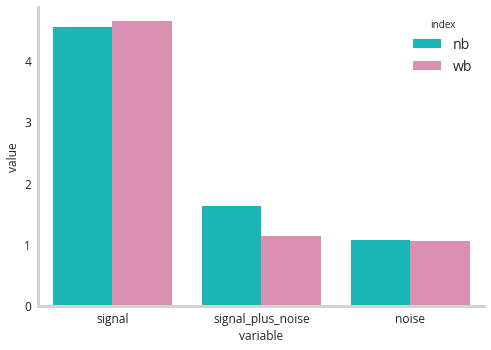

In [80]:
formated_results=pd.melt(test_results.T.reset_index(), id_vars='index',value_vars=['signal','signal_plus_noise','noise'])

sns.barplot(x='variable',y='value',hue='index',data=formated_results)



,index,variable,value
0,nb,signal,4.548638
1,wb,signal,4.643888
2,nb,signal_plus_noise,1.631985
3,wb,signal_plus_noise,1.131997
4,nb,noise,1.079090
5,wb,noise,1.064616
